# Simulation initialisation and run

In [1]:
import context

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
from RiverNetworkCase import RiverNetwork
import pandas as pd
import time

In [4]:
river_data = 'data_gloric/padma_gloric_1m3_final_no_geo.pkl'
watersheds_data = 'data_gloric/areas_gloric_no_geo.pkl'
rain_data = 'data_pmm/20130616-S000000-E002959-20130617-S233000-E235959.pkl'
result_data = 'data_results/overflow_130616_130617_2.pkl'

In [5]:
padma = pd.read_pickle(river_data)
padma = padma.set_index('Reach_ID',drop=False)
padma.head()

,Reach_ID,Next_down,Length_km,Log_Q_avg,Log_Q_var,Class_hydr,Temp_min,CMI_indx,Log_elev,Class_phys,Lake_wet,Stream_pow,Class_geom,Reach_type,Kmeans_30
Reach_ID,,,,,,,,,,,,,,,
40763397,40763397,40764488,6.753,0.98529,0.60554,13,16.1,-0.441,2.25768,311,0,0.19790,11,311,4
40894470,40894470,40894471,1.246,0.22194,0.35383,12,16.9,0.228,2.47712,331,0,0.05036,11,511,11
40894471,40894471,40893932,1.244,0.36154,0.35388,12,17.0,0.231,2.48287,331,0,0.08349,11,511,11
40763399,40763399,40762358,2.722,0.61847,0.60323,13,16.1,-0.393,2.24055,321,0,0.08569,11,611,4
40763402,40763402,40763652,1.544,3.13560,0.48803,43,16.6,0.026,2.16732,321,1,0.00000,21,643,24


In [6]:
start = time.time()
rivernetwork = RiverNetwork(river_data, rain_data, delta_t = 30, t_max = 60) #2*24*60)
end = time.time()
print('Duration: {:.2f}'.format(end - start) + 's')

Duration: 0.07s


In [7]:
# nodes to get output
node_list = [40641811, 50000000]

In [8]:
start = time.time()
results = rivernetwork.calculate_flows(x = 0.2, speed = 2, runoff_coeff = 0.5, base_load_factor = 1, max_capacity_factor = 1, node_list = node_list)
end = time.time()
print('Duration: {:.2f}'.format(end - start) + 's')

Duration: 312.11s                                 


In [10]:
results

{40641811: {'Length_km': 7.869,
  'Log_Q_avg': 0.67688,
  'Q_avg': 4.752039041097708,
  'Q_max': 11.611010024148701,
  'Log_Q_var': 0.38799,
  'split': 0,
  'C': {'0': 2.057491422035837,
   'C1': 0.02794248443522085,
   'C2': 0.41676549066113244,
   'C3': 0.5552920249036466,
   'dt': 30.0,
   'L': 7869.0},
  'source': False,
  'Qin': array([  4.75203904,  49.61101025, 119.92377694]),
  'Qout': array([ 4.75203904,  6.00551015, 27.36193719]),
  'Qover': array([ 0.        ,  0.        , 15.75092716]),
  'Original_ID': 40641811.0,
  'area_sk': 35.80251696621277,
  'static_inflow': 0.5710324277062,
  'rain': array([0.00000000e+00, 6.54855105e+00, 3.07899660e+00, 3.85157934e+00,
         5.39338823e+00, 3.61245152e+00, 5.13968585e+00, 6.94889217e+00,
         1.01499937e+01, 1.05023170e+01, 2.28869244e+01, 2.15262535e+01,
         1.33602844e+01, 1.22732356e+01, 1.73678351e+01, 1.65853695e+01,
         4.56273415e+00, 6.10919785e+00, 6.31046108e+00, 6.15848708e+00,
         6.54574481e+00, 1

In [6]:
overflow = rivernetwork.get_overflow()

In [7]:
overflow.to_pickle(result_data)

In [8]:
rivernetwork.G.nodes[40641811]

{'Length_km': 7.869,
 'Log_Q_avg': 0.67688,
 'Q_avg': 4.752039041097708,
 'Q_max': 11.611010024148701,
 'Log_Q_var': 0.38799,
 'split': 0,
 'C': {'0': 2.057491422035837,
  'C1': 0.02794248443522085,
  'C2': 0.41676549066113244,
  'C3': 0.5552920249036466,
  'dt': 30.0,
  'L': 7869.0},
 'source': False,
 'Qin': array([  4.75203904,  49.61101025, 119.92377694]),
 'Qout': array([ 4.75203904,  6.00551015, 27.36193719]),
 'Qover': array([ 0.        ,  0.        , 15.75092716]),
 'Original_ID': 40641811.0,
 'area_sk': 35.80251696621277,
 'static_inflow': 0.5710324277062,
 'rain': array([0.00000000e+00, 6.54855105e+00, 3.07899660e+00, 3.85157934e+00,
        5.39338823e+00, 3.61245152e+00, 5.13968585e+00, 6.94889217e+00,
        1.01499937e+01, 1.05023170e+01, 2.28869244e+01, 2.15262535e+01,
        1.33602844e+01, 1.22732356e+01, 1.73678351e+01, 1.65853695e+01,
        4.56273415e+00, 6.10919785e+00, 6.31046108e+00, 6.15848708e+00,
        6.54574481e+00, 1.42582326e+01, 1.04183267e+01, 6.66

In [8]:
import pickle
f = open("data_results/raw_object_130616_130617_2.pkl","wb")
pickle.dump(rivernetwork,f)
f.close()

In [9]:
for node_str in rivernetwork.G.nodes:
    node = rivernetwork.G.nodes[node_str]
    if node['source'] == True:
        #print(node);
        break;

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x121773950>)

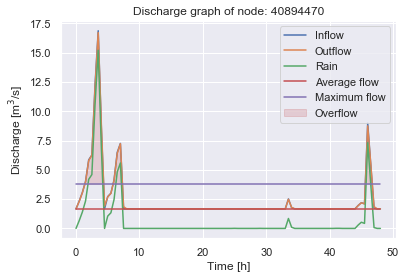

In [10]:
rivernetwork.plot_node_flows(node_str)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a28397810>)

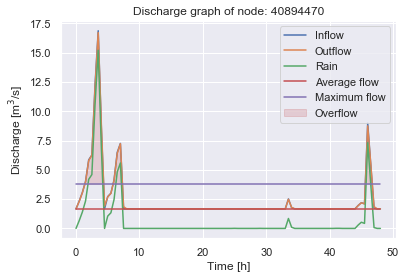

In [11]:
rivernetwork.plot_node_flows(node_str)

In [12]:
len(rivernetwork.get_node(50000000)['Qout'])

97

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a37553650>)

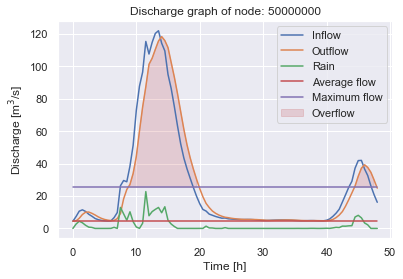

In [13]:
rivernetwork.plot_node_flows(50000000)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a3f540610>)

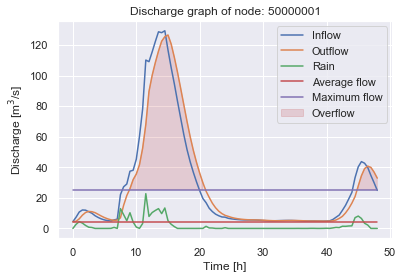

In [14]:
rivernetwork.plot_node_flows(50000001)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a37faba50>)

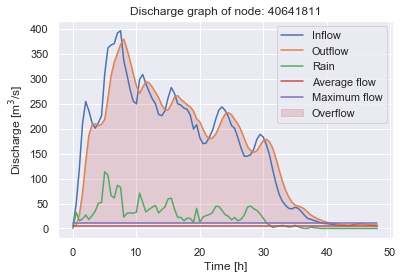

In [15]:
rivernetwork.plot_node_flows(40641811)